/Users/joaquinmartineza/Desktop/desafio_HDI/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/joaquinmartineza/Desktop/desafio_HDI/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LightGBM] [Info] Number of positive: 70, number of negative: 2095
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 2165, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 148, number of negative: 4181
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 413
[LightGBM] [Info] Number of data points in the train set: 4329, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number 

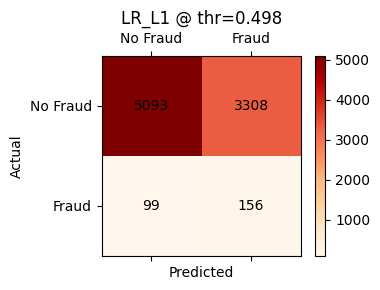

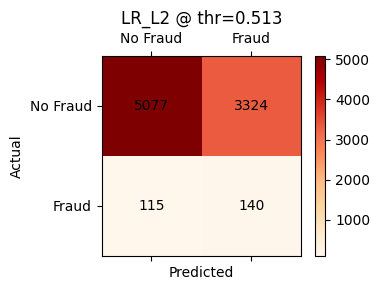

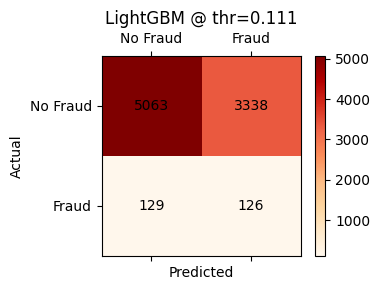

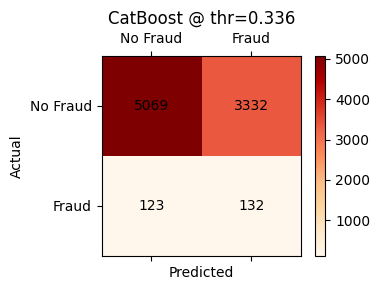

In [ ]:
# Modeling and Evaluation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, confusion_matrix
from lightgbm import LGBMClassifier       # pip install lightgbm
from catboost import CatBoostClassifier   # pip install catboost

# 1) Carga de datos procesados
df = pd.read_csv('../data/processed/fraud_prepared.csv')
X = df.drop('fraude_bin', axis=1)
y = df['fraude_bin'].values

# 2) Validación cruzada temporal
tscv = TimeSeriesSplit(n_splits=4)

# 3) Definición de modelos
models = {
    'LR_L1': LogisticRegression(
        penalty='l1', solver='liblinear', class_weight='balanced', random_state=42
    ),
    'LR_L2': LogisticRegression(
        penalty='l2', solver='liblinear', class_weight='balanced', random_state=42
    ),
    'LightGBM': LGBMClassifier(
        n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1
    ),
    'CatBoost': CatBoostClassifier(
        iterations=100, auto_class_weights='Balanced', random_seed=42, verbose=False
    )
}

# 4) Entrenamiento, umbral y recall@40%
results = []
cms = {}

for name, model in models.items():
    fold_recalls = []
    fold_thresholds = []
    sum_cm = np.zeros((2, 2), dtype=int)
    
    for train_idx, val_idx in tscv.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        model.fit(X_train, y_train)
        y_proba = model.predict_proba(X_val)[:, 1]
        
        # Umbral para el top 40%
        thr = np.percentile(y_proba, 60)
        fold_thresholds.append(thr)
        
        y_pred = (y_proba >= thr).astype(int)
        fold_recalls.append(recall_score(y_val, y_pred))
        sum_cm += confusion_matrix(y_val, y_pred)
    
    results.append({
        'model': name,
        'mean_recall@40%': np.mean(fold_recalls),
        'std_recall@40%': np.std(fold_recalls),
        'mean_threshold': np.mean(fold_thresholds)
    })
    cms[name] = sum_cm

# 5) Mostrar métricas
results_df = pd.DataFrame(results).set_index('model')
print(results_df)

# 6) Dibujar matrices de confusión como heatmaps
for name, cm in cms.items():
    fig, ax = plt.subplots(figsize=(4, 3))
    cax = ax.matshow(cm, cmap='OrRd')
    fig.colorbar(cax)
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No Fraud', 'Fraud'])
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['No Fraud', 'Fraud'])
    
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, val, ha='center', va='center', color='black')
        
    thr = results_df.loc[name, 'mean_threshold']
    ax.set_title(f'{name} @ thr={thr:.3f}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    plt.tight_layout()
    plt.show()

/Users/joaquinmartineza/Desktop/desafio_HDI/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/joaquinmartineza/Desktop/desafio_HDI/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LightGBM] [Info] Number of positive: 70, number of negative: 2095
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 2165, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 47, number of negative: 1396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 378
[LightGBM] [Info] Number of data points in the train set: 1443, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of 

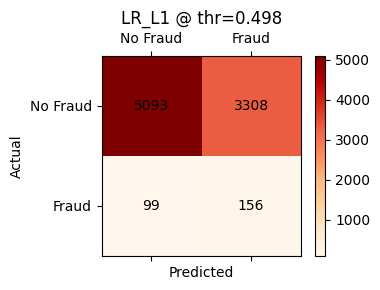

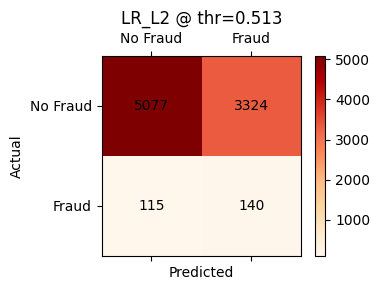

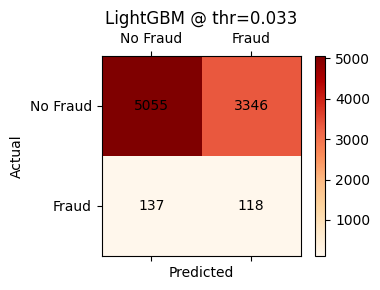

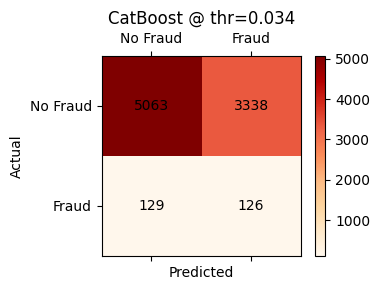

In [2]:
# Modeling and Evaluation – con calibración de boosters (versión compatible)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV

from lightgbm import LGBMClassifier      # pip install lightgbm
from catboost import CatBoostClassifier  # pip install catboost

# 1) Carga de datos procesados
df = pd.read_csv('../data/processed/fraud_prepared.csv')
X = df.drop('fraude_bin', axis=1)
y = df['fraude_bin'].values

# 2) Validación cruzada temporal
tscv = TimeSeriesSplit(n_splits=4)

# 3) Definición de modelos
models = {
    'LR_L1': LogisticRegression(
        penalty='l1', solver='liblinear', class_weight='balanced', random_state=42
    ),
    'LR_L2': LogisticRegression(
        penalty='l2', solver='liblinear', class_weight='balanced', random_state=42
    ),
    'LightGBM': LGBMClassifier(
        n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1
    ),
    'CatBoost': CatBoostClassifier(
        iterations=100, auto_class_weights='Balanced', random_seed=42, verbose=False
    )
}

# 4) Loop de CV con calibración para boosters
results = []
cms = {}

for name, model in models.items():
    fold_recalls = []
    fold_thresholds = []
    sum_cm = np.zeros((2,2), dtype=int)
    
    for train_idx, val_idx in tscv.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Entrenar modelo base
        model.fit(X_train, y_train)
        
        # Obtener probabilidades calibradas si es booster
        if name in ['LightGBM', 'CatBoost']:
            # Pasa el modelo entrenado como argumento posicional
            calib = CalibratedClassifierCV(
                model,        # modelo base
                method='sigmoid',
                cv=3
            )
            calib.fit(X_train, y_train)
            y_proba = calib.predict_proba(X_val)[:, 1]
        else:
            y_proba = model.predict_proba(X_val)[:, 1]
        
        # Umbral top 40%
        thr = np.percentile(y_proba, 60)
        fold_thresholds.append(thr)
        
        # Predicción y métricas
        y_pred = (y_proba >= thr).astype(int)
        fold_recalls.append(recall_score(y_val, y_pred))
        sum_cm += confusion_matrix(y_val, y_pred)
    
    results.append({
        'model': name,
        'mean_recall@40%': np.mean(fold_recalls),
        'std_recall@40%': np.std(fold_recalls),
        'mean_threshold': np.mean(fold_thresholds)
    })
    cms[name] = sum_cm

# 5) Mostrar métricas
results_df = pd.DataFrame(results).set_index('model')
print(results_df)

# 6) Dibujar matrices de confusión como heatmaps
for name, cm in cms.items():
    fig, ax = plt.subplots(figsize=(4, 3))
    cax = ax.matshow(cm, cmap='OrRd')
    fig.colorbar(cax)
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No Fraud', 'Fraud'])
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['No Fraud', 'Fraud'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, val, ha='center', va='center', color='black')
    
    thr = results_df.loc[name, 'mean_threshold']
    ax.set_title(f'{name} @ thr={thr:.3f}')
    plt.tight_layout()
    plt.show()

In [3]:
# ───── Grid Search Manual para Boosters ─────

import pandas as pd
import numpy as np

from itertools import product
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import recall_score
from sklearn.calibration import CalibratedClassifierCV

# Carga de datos
df = pd.read_csv('../data/processed/fraud_prepared.csv')
X = df.drop('fraude_bin', axis=1)
y = df['fraude_bin'].values

# CV temporal
tscv = TimeSeriesSplit(n_splits=4)

# Función de scoring
def recall_at_40(y_true, y_proba):
    thr = np.percentile(y_proba, 60)
    y_pred = (y_proba >= thr).astype(int)
    return recall_score(y_true, y_pred), thr

# Parámetros a buscar
param_grid = {
    'LightGBM': {
        'num_leaves': [31, 63],
        'learning_rate': [0.1, 0.01],
        'max_depth': [-1, 5]
    },
    'CatBoost': {
        'depth': [6, 8],
        'learning_rate': [0.1, 0.01],
        'l2_leaf_reg': [3, 10]
    }
}

results = []

# Iterar sobre cada modelo y su grid
for model_name, grid in param_grid.items():
    # Import dinámico
    if model_name == 'LightGBM':
        from lightgbm import LGBMClassifier
    else:
        from catboost import CatBoostClassifier
    
    keys, values = zip(*grid.items())
    for vals in product(*values):
        params = dict(zip(keys, vals))
        
        # Instanciar
        if model_name == 'LightGBM':
            base = LGBMClassifier(
                n_estimators=100, class_weight='balanced',
                random_state=42, n_jobs=-1, **params
            )
        else:
            base = CatBoostClassifier(
                iterations=100, auto_class_weights='Balanced',
                random_seed=42, verbose=False, **params
            )
        
        # Evaluar en CV
        fold_recs, fold_ths = [], []
        for train_idx, val_idx in tscv.split(X):
            Xtr, Xv = X.iloc[train_idx], X.iloc[val_idx]
            ytr, yv = y[train_idx], y[val_idx]
            
            # Entrenar y calibrar
            base.fit(Xtr, ytr)
            calib = CalibratedClassifierCV(base, method='sigmoid', cv=3)
            calib.fit(Xtr, ytr)
            proba = calib.predict_proba(Xv)[:,1]
            
            r, thr = recall_at_40(yv, proba)
            fold_recs.append(r)
            fold_ths.append(thr)
        
        results.append({
            'model': model_name,
            **params,
            'mean_recall@40%': np.mean(fold_recs),
            'std_recall@40%': np.std(fold_recs),
            'mean_threshold': np.mean(fold_ths)
        })

# Mostrar resultados ordenados
res_df = pd.DataFrame(results).sort_values('mean_recall@40%', ascending=False)
print(res_df)

[LightGBM] [Info] Number of positive: 70, number of negative: 2095
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 2165, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 47, number of negative: 1396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 378
[LightGBM] [Info] Number of data points in the train set: 1443, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of 

## Se intentará empujar el recall de CatBoost lo más posible.

In [17]:
import numpy as np
import pandas as pd

from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import recall_score
from catboost import CatBoostClassifier

# 1) Carga de datos
df = pd.read_csv('../data/processed/fraud_prepared.csv')
X = df.drop('fraude_bin', axis=1)
y = df['fraude_bin'].values

# 2) CV temporal
tscv = TimeSeriesSplit(n_splits=4)

# 3) Tu función scorer “a mano”
def recall_at_40_estimator(estimator, X, y_true):
    # predecimos probabilidades de fraude
    y_proba = estimator.predict_proba(X)[:, 1]
    # umbral que deja el 40 % con mayor score
    thr = np.percentile(y_proba, 60)
    y_pred = (y_proba >= thr).astype(int)
    return recall_score(y_true, y_pred)

# 4) Espacio de búsqueda
param_dist = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 10],
    'bagging_temperature': [0, 0.3, 0.7, 1.0],
    'border_count': [32, 64, 128]
}

# 5) Configuramos el RandomizedSearch
cb = CatBoostClassifier(
    iterations=200,
    auto_class_weights='Balanced',
    random_seed=42,
    verbose=False
)

search = RandomizedSearchCV(
    estimator=cb,
    param_distributions=param_dist,
    n_iter=30,
    scoring=recall_at_40_estimator,  # nuestro scorer directo
    cv=tscv,
    refit=True,
    random_state=42,
    verbose=2,
    n_jobs=-1,
    error_score='raise'
)

# 6) Arrancamos la búsqueda
search.fit(X, y)

print("▶ Best recall@40% (CV):", search.best_score_)
print("▶ Best params:", search.best_params_)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
[CV] END bagging_temperature=0.3, border_count=128, depth=4, l2_leaf_reg=3, learning_rate=0.001; total time=   0.2s
[CV] END bagging_temperature=1.0, border_count=64, depth=6, l2_leaf_reg=10, learning_rate=0.001; total time=   0.3s
[CV] END bagging_temperature=0.3, border_count=128, depth=4, l2_leaf_reg=3, learning_rate=0.001; total time=   0.3s
[CV] END bagging_temperature=1.0, border_count=64, depth=6, l2_leaf_reg=10, learning_rate=0.001; total time=   0.4s
[CV] END bagging_temperature=0.3, border_count=128, depth=4, l2_leaf_reg=3, learning_rate=0.001; total time=   0.4s
[CV] END bagging_temperature=1.0, border_count=64, depth=6, l2_leaf_reg=10, learning_rate=0.001; total time=   0.4s
[CV] END bagging_temperature=0.3, border_count=128, depth=4, l2_leaf_reg=3, learning_rate=0.001; total time=   0.5s
[CV] END bagging_temperature=1.0, border_count=64, depth=6, l2_leaf_reg=10, learning_rate=0.001; total time=   0.6s
[CV] END b

Final recall@40%: 0.852 @ thr=0.0314
Confusion matrix:
 [[6444 4052]
 [  48  277]]


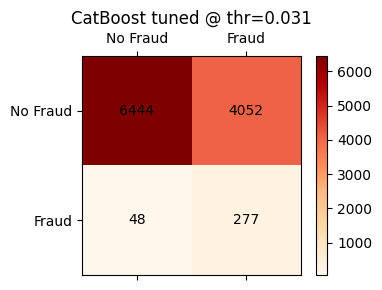

In [18]:
# 6) Evaluación final del mejor modelo
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

best_cb = search.best_estimator_

# recalibrar
calib = CalibratedClassifierCV(best_cb, method='sigmoid', cv=3)
calib.fit(X, y)
proba = calib.predict_proba(X)[:, 1]

# umbral 60 perc.
thr = np.percentile(proba, 60)
y_pred = (proba >= thr).astype(int)
final_recall = recall_score(y, y_pred)
cm = confusion_matrix(y, y_pred)

print(f"Final recall@40%: {final_recall:.3f} @ thr={thr:.4f}")
print("Confusion matrix:\n", cm)

# heatmap
fig, ax = plt.subplots(figsize=(4,3))
cax = ax.matshow(cm, cmap='OrRd'); fig.colorbar(cax)
ax.set_xticks([0,1]); ax.set_xticklabels(['No Fraud','Fraud'])
ax.set_yticks([0,1]); ax.set_yticklabels(['No Fraud','Fraud'])
for (i,j), v in np.ndenumerate(cm): ax.text(j,i,v,ha='center',va='center')
ax.set_title(f'CatBoost tuned @ thr={thr:.3f}')
plt.tight_layout()
plt.show()

# Recall vs. % de alertas revisadas para el CatBoost final afinado.

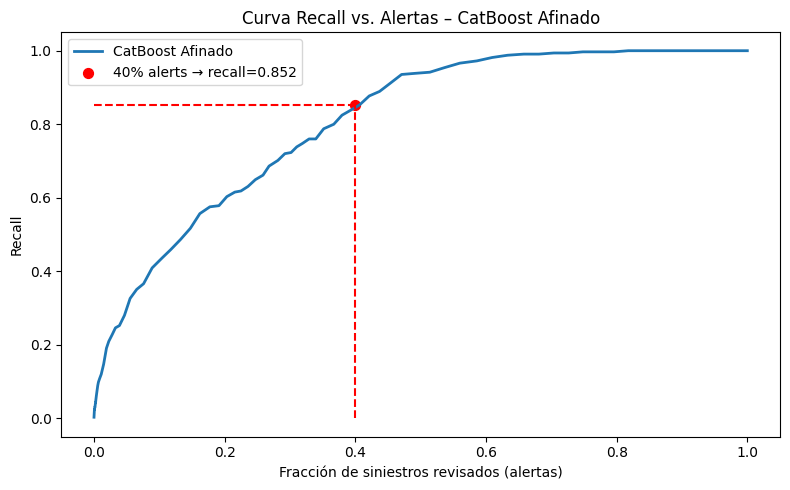

/Users/joaquinmartineza/Desktop/desafio_HDI/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/joaquinmartineza/Desktop/desafio_HDI/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


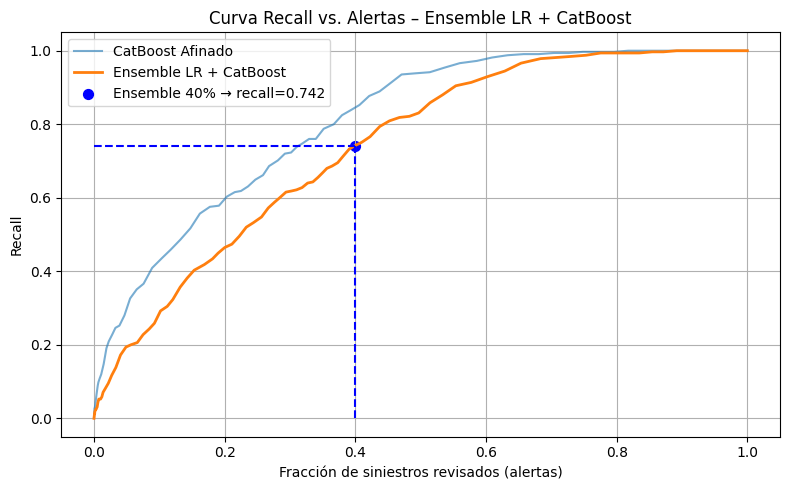

In [21]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import recall_score

# 1) Carga de datos procesados
df = pd.read_csv('../data/processed/fraud_prepared.csv')
X = df.drop('fraude_bin', axis=1)
y = df['fraude_bin'].values

# 2) Entrena y calibra CatBoost afinado (mejores params)
cb = CatBoostClassifier(
    iterations=200,
    auto_class_weights='Balanced',
    depth=10,
    learning_rate=0.001,
    l2_leaf_reg=10,
    bagging_temperature=1.0,
    border_count=32,
    random_seed=42,
    verbose=False
)
cb.fit(X, y)
calib_cb = CalibratedClassifierCV(cb, method='sigmoid', cv=3)
calib_cb.fit(X, y)
proba_cb = calib_cb.predict_proba(X)[:, 1]

# 3) Curva Recall vs. Alertas – CatBoost Afinado
thresholds = np.linspace(proba_cb.min(), proba_cb.max(), 100)
recalls_cb = []
alerts_cb = []

for t in thresholds:
    y_pred = (proba_cb >= t).astype(int)
    recalls_cb.append(recall_score(y, y_pred))
    alerts_cb.append(y_pred.mean())

# Punto exacto al 40%
thr40_cb = np.percentile(proba_cb, 60)
recall40_cb = recall_score(y, (proba_cb >= thr40_cb).astype(int))
alerts40_cb = (proba_cb >= thr40_cb).mean()

plt.figure(figsize=(8, 5))
plt.plot(alerts_cb, recalls_cb, label='CatBoost Afinado', linewidth=2)
plt.scatter([alerts40_cb], [recall40_cb], color='red', s=50,
            label=f'40% alerts → recall={recall40_cb:.3f}')
plt.vlines(alerts40_cb, 0, recall40_cb, linestyles='dashed', color='red')
plt.hlines(recall40_cb, 0, alerts40_cb, linestyles='dashed', color='red')
plt.xlabel('Fracción de siniestros revisados (alertas)')
plt.ylabel('Recall')
plt.title('Curva Recall vs. Alertas – CatBoost Afinado')
plt.legend()
plt.tight_layout()
plt.show()


# 4) Calibración de Logistic Regression
lr = LogisticRegression(
    penalty='l1', solver='liblinear', class_weight='balanced', random_state=42
)
calib_lr = CalibratedClassifierCV(lr, method='sigmoid', cv=3)
calib_lr.fit(X, y)
proba_lr = calib_lr.predict_proba(X)[:, 1]

# 5) Ensemble simple (media de probabilidades)
proba_ens = 0.5 * proba_lr + 0.5 * proba_cb

# 6) Curva Recall vs. Alertas – Ensemble LR + CatBoost
thresholds = np.linspace(proba_ens.min(), proba_ens.max(), 100)
recalls_ens = []
alerts_ens = []

for t in thresholds:
    y_pred = (proba_ens >= t).astype(int)
    recalls_ens.append(recall_score(y, y_pred))
    alerts_ens.append(y_pred.mean())

# Punto exacto al 40% para ensemble
thr40_en = np.percentile(proba_ens, 60)
recall40_en = recall_score(y, (proba_ens >= thr40_en).astype(int))
alerts40_en = (proba_ens >= thr40_en).mean()

plt.figure(figsize=(8, 5))
plt.plot(alerts_cb, recalls_cb, label='CatBoost Afinado', alpha=0.6)
plt.plot(alerts_ens, recalls_ens, label='Ensemble LR + CatBoost', linewidth=2)
plt.scatter([alerts40_en], [recall40_en], color='blue', s=50,
            label=f'Ensemble 40% → recall={recall40_en:.3f}')
plt.vlines(alerts40_en, 0, recall40_en, linestyles='dashed', color='blue')
plt.hlines(recall40_en, 0, alerts40_en, linestyles='dashed', color='blue')
plt.xlabel('Fracción de siniestros revisados (alertas)')
plt.ylabel('Recall')
plt.title('Curva Recall vs. Alertas – Ensemble LR + CatBoost')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()